In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data analysis

In [4]:
df = pd.read_csv("train_logs.csv")
test_logs = pd.read_csv("test_logs.csv")
train_scores = pd.read_csv("train_scores.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train_logs.csv'

In [182]:
train_scores

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0
...,...,...
2466,ffb8c745,3.5
2467,ffbef7e5,4.0
2468,ffccd6fd,1.5
2469,ffec5b38,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [8]:
df.describe()

,event_id,down_time,up_time,action_time,cursor_position,word_count
count,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06
mean,2.067649e+03,7.935603e+05,7.936584e+05,9.808498e+01,1.222964e+03,2.314687e+02
std,1.588284e+03,5.149451e+05,5.149428e+05,2.533985e+02,9.485242e+02,1.759088e+02
min,1.000000e+00,1.060000e+02,2.520000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.520000e+02,3.731842e+05,3.732820e+05,6.600000e+01,4.990000e+02,9.600000e+01
50%,1.726000e+03,7.208860e+05,7.209800e+05,9.300000e+01,1.043000e+03,2.000000e+02
75%,2.926000e+03,1.163042e+06,1.163141e+06,1.220000e+02,1.706000e+03,3.270000e+02
max,1.287600e+04,8.313630e+06,8.313707e+06,4.474700e+05,7.802000e+03,1.326000e+03


value count ~ 840500\
mean essay lenght ~ 231 words \
max essay lenght ~ 1326 words \
mean action time ~ 98 milliseconds \
max action time ~ 4.5 seconds 

In [10]:
df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


In [12]:
print(f'count of unique ids {len(df["id"].unique())} \ncount of unique activities {len(df["activity"].unique())}') 
print(f'count of unique down events {len(df["down_event"].unique())}\ncount of unique up events {len(df["up_event"].unique())}')
print(f'count of unique text changes {len(df["text_change"].unique())}')

count of unique ids 2471 
count of unique activities 50
count of unique down events 131
count of unique up events 130
count of unique text changes 4111


In [6]:
for i in df["up_event"].unique():
    if i not in df["down_event"].unique():
        print(i)

KeyboardInterrupt: 

In [8]:
temp = df.groupby(by="text_change").count()
temp[temp['id']>1000]

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,cursor_position,word_count
text_change,,,,,,,,,,
\n,27977,27977,27977,27977,27977,27977,27977,27977,27977,27977
,1376829,1376829,1376829,1376829,1376829,1376829,1376829,1376829,1376829,1376829
"""",4659,4659,4659,4659,4659,4659,4659,4659,4659,4659
',13192,13192,13192,13192,13192,13192,13192,13192,13192,13192
",",54797,54797,54797,54797,54797,54797,54797,54797,54797,54797
-,4492,4492,4492,4492,4492,4492,4492,4492,4492,4492
.,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
/,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354
;,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905


<Axes: xlabel='word_count', ylabel='count'>

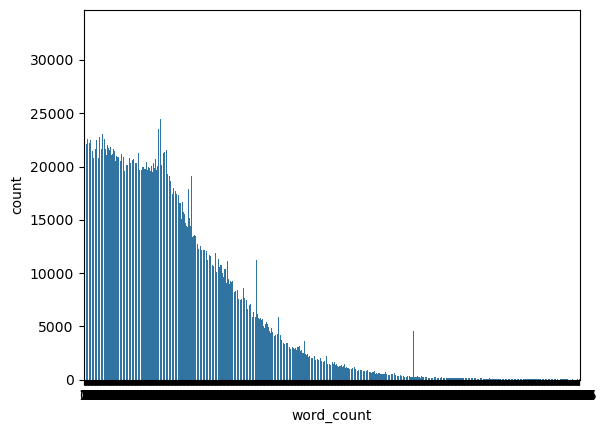

In [16]:
sns.countplot(data=df, x = df["word_count"])
#chujowo jest to zrobione, popraw żeby dół działał jak będziesz mieć czas, pewnie ogólnie można innym plotem to zrobić też

<Axes: xlabel='activity', ylabel='count'>

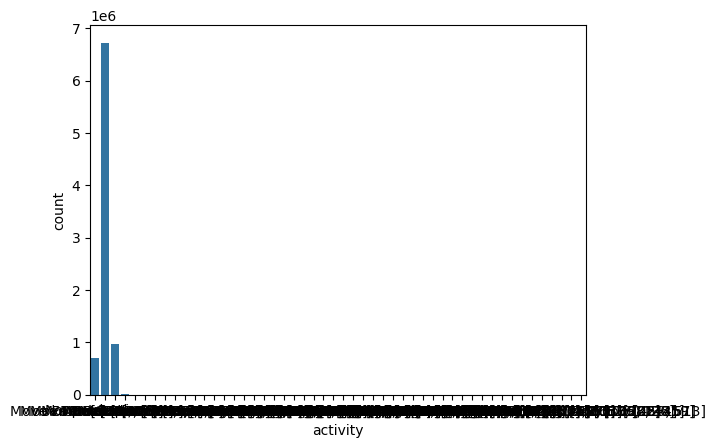

In [18]:
sns.countplot(data=df, x = df["activity"])
#ten sam problem co wyżej, ale i tak to pokazuje, że jakiejs aktywności jest o wiele więcej

<Axes: xlabel='up_event', ylabel='count'>

D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 155 (\x9b) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 151 (\x97) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 134 (\x86) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPyt

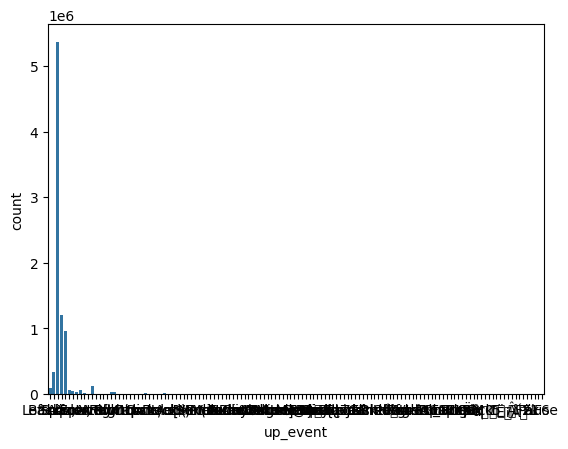

In [20]:
sns.countplot(data=df, x = df["up_event"])

In [6]:
temp = df.groupby(by="activity").count()

NameError: name 'df' is not defined

In [5]:
temp[temp['id']]

NameError: name 'temp' is not defined

In [26]:
temp = df.groupby(by="up_event").count()

In [28]:
temp.max()

id                 5364789
event_id           5364789
down_time          5364789
up_time            5364789
action_time        5364789
activity           5364789
down_event         5364789
text_change        5364789
cursor_position    5364789
word_count         5364789
dtype: int64

In [30]:
temp[temp["id"] > 10000]

,id,event_id,down_time,up_time,action_time,activity,down_event,text_change,cursor_position,word_count
up_event,,,,,,,,,,
',11170,11170,11170,11170,11170,11170,11170,11170,11170,11170
",",46806,46806,46806,46806,46806,46806,46806,46806,46806,46806
.,59586,59586,59586,59586,59586,59586,59586,59586,59586,59586
ArrowDown,30874,30874,30874,30874,30874,30874,30874,30874,30874,30874
ArrowLeft,63217,63217,63217,63217,63217,63217,63217,63217,63217,63217
ArrowRight,121338,121338,121338,121338,121338,121338,121338,121338,121338,121338
ArrowUp,28189,28189,28189,28189,28189,28189,28189,28189,28189,28189
Backspace,964089,964089,964089,964089,964089,964089,964089,964089,964089,964089
CapsLock,12568,12568,12568,12568,12568,12568,12568,12568,12568,12568


In [32]:
df.isnull().values.any()

False

In [40]:
df[df['activity'] == "input"].count()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

In [80]:
#checking how often up_event differentiates from down_event, if difference is not statistically significant, then we should 
#delete one of the columns
from IPython.display import clear_output
i = 0
counter = 0
while(i<len(df['down_event'])):
    print('iteration:', i)
    i+=1
    if(df['down_event'][i] != df['up_event'][i]):
        counter +=1
        print('counter:', counter)
    clear_output(wait=True) 
print('counter:', counter)

iteration: 2564452


In [3]:
df.drop('down_event', axis = 1)
df.drop('event_id', axis = 1)

,id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,106686,106777,91,Input,q,q,q,1,1
4,001519c8,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


### Defining X and Y

In [159]:
#we need to group by the data by id and make the columns into counts, maxes and means of the data, so the standard alghoritms could 
#train on it
X = df[['id', 'action_time','down_time']]
X = X.groupby(['id']).mean()
X.rename(columns = {'action_time':'mean_action_time'}, inplace = True)

In [160]:
X = X.join(df[['id', 'word_count']].groupby(['id']).max())

In [161]:
def group_by_count(df, X, column, value, name):
    temp = df[['id', column]]
    temp = temp[temp[column] == value] 
    X = X.join(temp.groupby(['id']).count())
    X.rename(columns = {column:name}, inplace = True)
    return X

In [162]:
X = group_by_count(df,X, 'text_change', ',', 'coma_count')
X = group_by_count(df,X, 'activity', 'Input', 'Input_count')
X = group_by_count(df,X, 'activity', 'Nonproduction', 'Nonprod_count')
X = group_by_count(df,X, 'activity', 'Remove/Cut', 'cut_count')
X = group_by_count(df,X, 'activity', 'Replace', 'Replace_count')
X = group_by_count(df,X, 'text_change', '.', 'dot_count')
X = group_by_count(df,X, 'text_change', 'q', 'q_count')
X = group_by_count(df,X, 'text_change', 'NoChange', 'no_change_count')
X = group_by_count(df,X, 'text_change', ' ', 'space_count')
X = group_by_count(df,X, 'up_event', 'Backspace', 'Backspace_count')
X = group_by_count(df,X, 'up_event', 'Shift', 'Shift_count')

In [163]:
X

,mean_action_time,down_time,word_count,action_time,coma_count,Input_count,Nonprod_count,cut_count,Replace_count,dot_count,q_count,no_change_count,space_count,Backspace_count,Shift_count
id,,,,,,,,,,,,,,,
001519c8,116.246774,8.481808e+05,256,2259,14.0,2010,120,417.0,7.0,28,1940,120,436,417.0,27.0
0022f953,112.221271,5.188553e+05,323,1758,24.0,1938,254,260.0,1.0,18,1698,254,432,260.0,97.0
0042269b,101.837766,8.284918e+05,404,3005,26.0,3515,175,439.0,7.0,23,3257,175,615,439.0,39.0
0059420b,121.848329,7.854830e+05,206,806,3.0,1304,99,151.0,1.0,13,1146,99,281,152.0,68.0
0075873a,123.943896,7.133542e+05,252,701,25.0,1942,72,517.0,NaN,32,1964,72,397,517.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb8c745,105.437856,7.361019e+05,461,3323,42.0,3588,189,960.0,2.0,59,3605,189,813,960.0,164.0
ffbef7e5,82.266129,8.419662e+05,438,1144,24.0,2395,148,60.0,1.0,33,1920,148,457,60.0,106.0
ffccd6fd,75.605615,1.229015e+06,201,564,3.0,2849,126,88.0,NaN,6,1031,126,1879,88.0,NaN


In [164]:
X = X.fillna(0)

In [165]:
X.isnull().values.any()

False

In [166]:
y = pd.DataFrame(train_scores)

In [167]:
y = y.groupby(['id']).mean()

In [168]:
y = y['score']

In [169]:
#we merge score with X so we can analyse correlations
df1= pd.DataFrame(X)
y = pd.DataFrame(train_scores)

merged_df = pd.merge(df1, y, on='id', how='inner')

merged_df

,id,mean_action_time,down_time,word_count,action_time,coma_count,Input_count,Nonprod_count,cut_count,Replace_count,dot_count,q_count,no_change_count,space_count,Backspace_count,Shift_count,score
0,001519c8,116.246774,8.481808e+05,256,2259,14.0,2010,120,417.0,7.0,28,1940,120,436,417.0,27.0,3.5
1,0022f953,112.221271,5.188553e+05,323,1758,24.0,1938,254,260.0,1.0,18,1698,254,432,260.0,97.0,3.5
2,0042269b,101.837766,8.284918e+05,404,3005,26.0,3515,175,439.0,7.0,23,3257,175,615,439.0,39.0,6.0
3,0059420b,121.848329,7.854830e+05,206,806,3.0,1304,99,151.0,1.0,13,1146,99,281,152.0,68.0,2.0
4,0075873a,123.943896,7.133542e+05,252,701,25.0,1942,72,517.0,0.0,32,1964,72,397,517.0,39.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,105.437856,7.361019e+05,461,3323,42.0,3588,189,960.0,2.0,59,3605,189,813,960.0,164.0,3.5
2467,ffbef7e5,82.266129,8.419662e+05,438,1144,24.0,2395,148,60.0,1.0,33,1920,148,457,60.0,106.0,4.0
2468,ffccd6fd,75.605615,1.229015e+06,201,564,3.0,2849,126,88.0,0.0,6,1031,126,1879,88.0,0.0,1.5
2469,ffec5b38,89.277915,5.765185e+05,413,1388,29.0,2895,71,276.0,0.0,34,2593,71,490,276.0,52.0,5.0


C:\Users\maryl\AppData\Local\Temp\ipykernel_18860\3622089823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr()


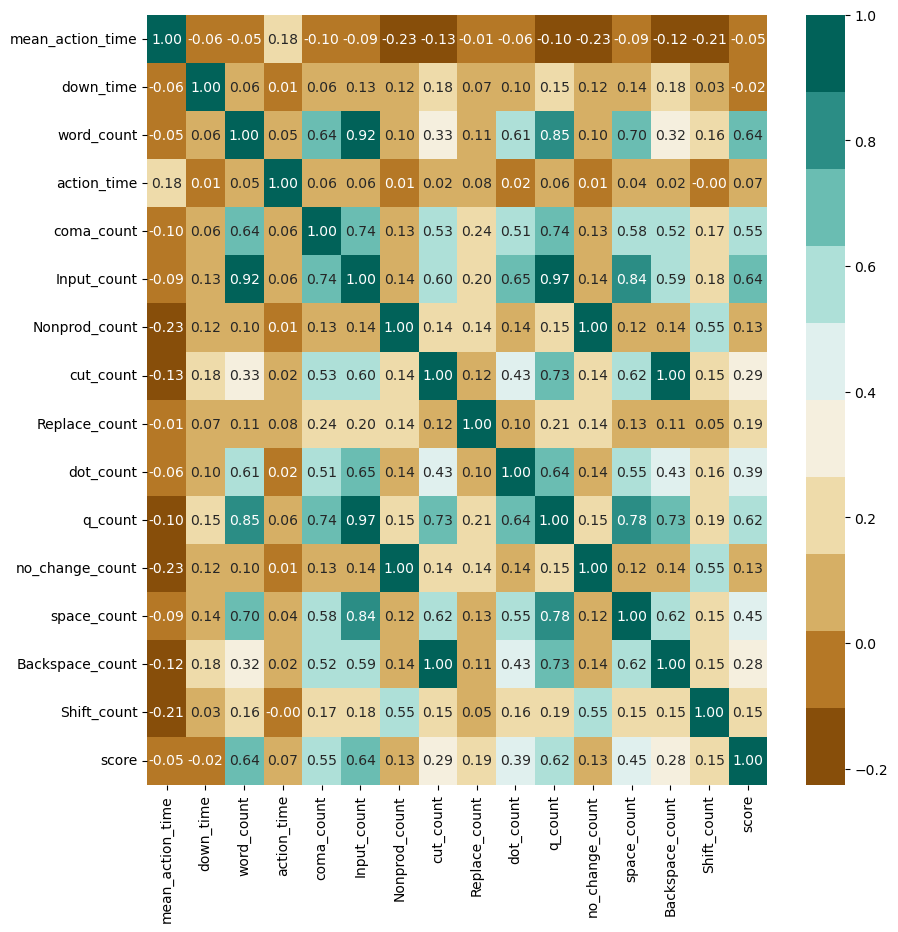

In [170]:
correlations = merged_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [19]:
#dropped columns are either duplicates or statistically insignificantant
X = X.drop(['action_time','down_time', 'Input_count', 'Backspace_count'], axis = 1)
merged_df = merged_df.drop(['action_time','down_time', 'Input_count', 'Backspace_count'], axis = 1)
merged_df

,id,word_count,coma_count,Nonprod_count,cut_count,dot_count,Replace_count,q_count,space_count,score
0,001519c8,256,14.0,120,417.0,28,7.0,1940,436,3.5
1,0022f953,323,24.0,254,260.0,18,1.0,1698,432,3.5
2,0042269b,404,26.0,175,439.0,23,7.0,3257,615,6.0
3,0059420b,206,3.0,99,151.0,13,1.0,1146,281,2.0
4,0075873a,252,25.0,72,517.0,32,0.0,1964,397,4.0
...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,461,42.0,189,960.0,59,2.0,3605,813,3.5
2467,ffbef7e5,438,24.0,148,60.0,33,1.0,1920,457,4.0
2468,ffccd6fd,201,3.0,126,88.0,6,0.0,1031,1879,1.5
2469,ffec5b38,413,29.0,71,276.0,34,0.0,2593,490,5.0


C:\Users\maryl\AppData\Local\Temp\ipykernel_16684\3622089823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr()


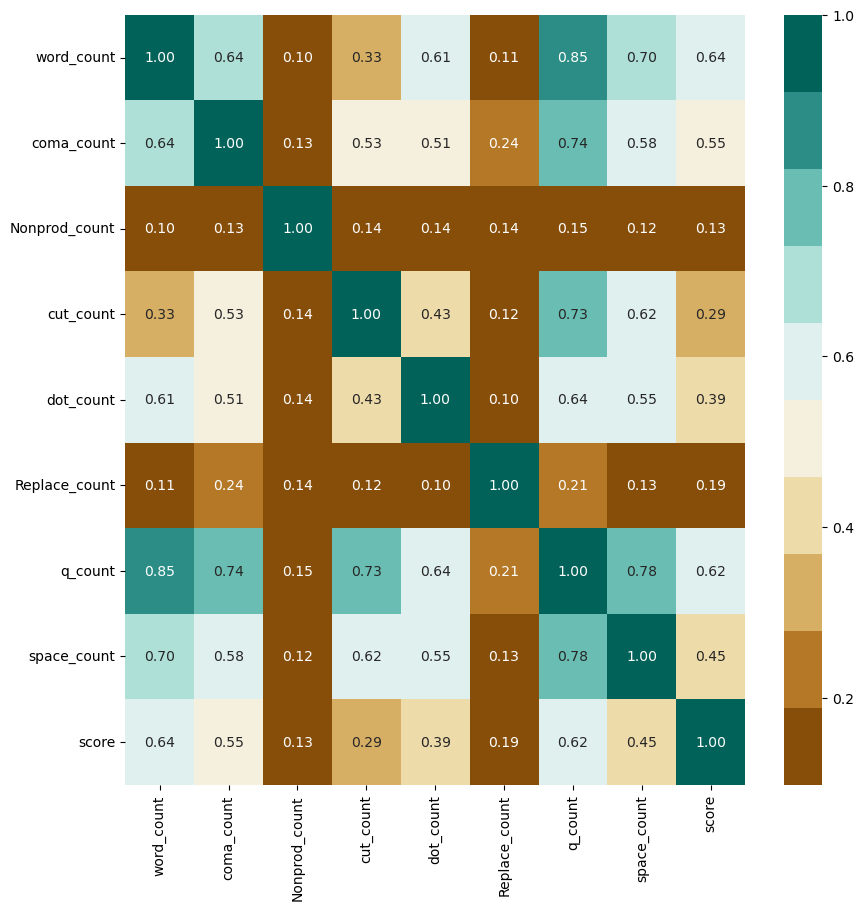

In [20]:
correlations = merged_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [21]:
accuracy_compare = pd.DataFrame(columns = ['Logistic Regression', 'SVM', 'Random Forests', 'Decision Trees', 'Ridge', 'Lasso'], index = ['MAE', 'MSE', 'RMSE'])

# AI modelling 

### Linear Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression()

In [26]:
lin_predictions = linmodel.predict(X_test)

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, lin_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lin_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_predictions)))
acc = np.array([metrics.mean_absolute_error(y_test, lin_predictions), metrics.mean_squared_error(y_test, lin_predictions), np.sqrt(metrics.mean_squared_error(y_test, lin_predictions))])
accuracy_compare['Logistic Regression'] = acc

MAE: 0.5542862799116794
MSE: 0.5561647508813067
RMSE: 0.7457645411799267


### Support Vector Machines

In [29]:
from sklearn import svm

In [30]:
#svmodel = svm.SVR(kernel = 'linear')
#svmodel.fit(X_train, y_train)
#not working

In [31]:
svmodel = svm.SVR(kernel = 'rbf')
svmodel.fit(X_train, y_train)

SVR()

In [32]:
SVR_predictions = svmodel.predict(X_test)

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, SVR_predictions))
print('MSE:', metrics.mean_squared_error(y_test, SVR_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, SVR_predictions)))
acc = np.array([metrics.mean_absolute_error(y_test, SVR_predictions), metrics.mean_squared_error(y_test, SVR_predictions), np.sqrt(metrics.mean_squared_error(y_test, SVR_predictions))])
accuracy_compare['SVM'] = acc

MAE: 0.7799344569795668
MSE: 0.9939627671852403
RMSE: 0.9969768137651148


### Random Forests

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
RF_predictions = RFmodel.predict(X_test)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, RF_predictions))
print('MSE:', metrics.mean_squared_error(y_test, RF_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions)))

MAE: 0.5090379901960784
MSE: 0.45022527573529414
RMSE: 0.6709882828599126


In [177]:
RFmodel = RandomForestRegressor(n_estimators = 200)
RFmodel.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [178]:
RF_predictions = RFmodel.predict(X_test)

In [179]:
print('MAE:', metrics.mean_absolute_error(y_test, RF_predictions))
print('MSE:', metrics.mean_squared_error(y_test, RF_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions)))

MAE: 0.5066023284313727
MSE: 0.4440783930759804
RMSE: 0.6663920715884759


In [41]:
RFmodel = RandomForestRegressor(n_estimators = 300)
RFmodel.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [42]:
RF_predictions = RFmodel.predict(X_test)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, RF_predictions))
print('MSE:', metrics.mean_squared_error(y_test, RF_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions)))
acc = np.array([metrics.mean_absolute_error(y_test, RF_predictions), metrics.mean_squared_error(y_test, RF_predictions), np.sqrt(metrics.mean_squared_error(y_test, RF_predictions))])
accuracy_compare['Random Forests'] = acc

MAE: 0.5058823529411764
MSE: 0.44544218409586056
RMSE: 0.6674145519059803


### Decision Trees

In [44]:
from sklearn.tree import DecisionTreeRegressor 

In [45]:
DFmodel = DecisionTreeRegressor()
DFmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
DF_predictions = RFmodel.predict(X_test)

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, DF_predictions))
print('MSE:', metrics.mean_squared_error(y_test, DF_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DF_predictions)))
acc = np.array([metrics.mean_absolute_error(y_test, DF_predictions), metrics.mean_squared_error(y_test, DF_predictions), np.sqrt(metrics.mean_squared_error(y_test, DF_predictions))])
accuracy_compare['Decision Trees'] = acc

MAE: 0.5058823529411764
MSE: 0.44544218409586056
RMSE: 0.6674145519059803


### Ridge regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
Rmodel = Ridge()
Rmodel.fit(X_train,y_train)

Ridge()

In [50]:
R_predictions = Rmodel.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, R_predictions))
print('MSE:', metrics.mean_squared_error(y_test, R_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, R_predictions)))
acc = np.array([metrics.mean_absolute_error(y_test, R_predictions), metrics.mean_squared_error(y_test, R_predictions), np.sqrt(metrics.mean_squared_error(y_test, R_predictions))])
accuracy_compare['Ridge'] = acc

MAE: 0.5542862782389082
MSE: 0.5561648209537963
RMSE: 0.7457645881602292


### Lasso

In [52]:
from sklearn.linear_model import Lasso

In [53]:
Lmodel = Lasso()
Lmodel.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+00, tolerance: 1.756e-01
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [54]:
L_predictions = Lmodel.predict(X_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, L_predictions))
print('MSE:', metrics.mean_squared_error(y_test, L_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, L_predictions)))
acc = np.array([metrics.mean_absolute_error(y_test, L_predictions), metrics.mean_squared_error(y_test, L_predictions), np.sqrt(metrics.mean_squared_error(y_test, L_predictions))])
accuracy_compare['Lasso'] = acc

MAE: 0.5580901980128976
MSE: 0.5634413068411915
RMSE: 0.7506272755776942


In [56]:
accuracy_compare

,Logistic Regression,SVM,Random Forests,Decision Trees,Ridge,Lasso
MAE,0.554286,0.779934,0.505882,0.505882,0.554286,0.558090
MSE,0.556165,0.993963,0.445442,0.445442,0.556165,0.563441
RMSE,0.745765,0.996977,0.667415,0.667415,0.745765,0.750627


<Axes: >

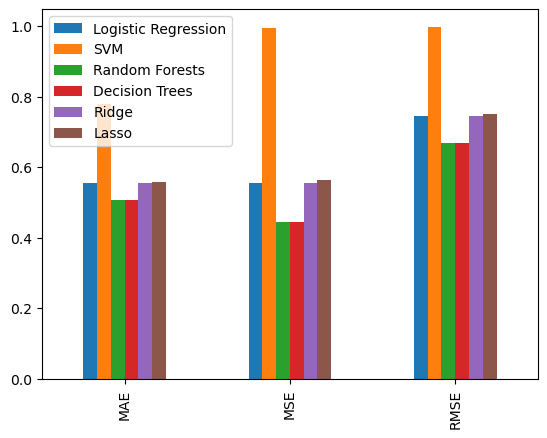

In [57]:
#accuracy of random forests are more effective by about 0.006 RMSE
df_compare = pd.DataFrame(accuracy_compare)
df_compare.plot(kind='bar')

## TODO
- ogarnąć wykresy
- przeanalizować textchange ✓✓✓
- dokończyć oczyszczanie ✓✓✓ /
a) usunąć niepotrzebne kolumny ✓✓✓ /
b) przerobić dataset zeby grupowal do id (policzyć kropki,przecinki, nonproduction, input, replace/remove, backspace) ✓✓✓ /
b) ~principal component analysis ✓✓✓
- korelacje ✓✓✓
- algorytm (regresja, SVC, Kneighbours, drzewka) ✓✓✓
- dokumentacja ✓✓✓
- komentarze ✓✓✓